# Pylabel End to End Example 
## Coco JSON to VOC XML
Use this notebook to try out importing, analyzing, and exporting datasets of image annotations. 

In [1]:
#!pip install -i https://test.pypi.org/simple/ pylabelalphatest==0.1.1 


In [2]:
from pylabelalpha import importer

## Import coco annotations 
First we will import annotations from the coco dataset, which are in coco json format. 

In [11]:
#Download the annotation file 
#!mkdir data/
#!curl https://raw.githubusercontent.com/pylabelalpha/notebook/main/coco_instances_val2017.json --output data/coco_instances_val2017.json
coco_annnotations = "/Users/alex/Google Drive/pylabel/datasets/wildlife/yolo_splits/val/labels/../voc_annotations/Wildlife.json"

#Import the dataset into the pylable schema 
dataset = importer.ImportCoco(coco_annnotations)
dataset.df.head(5)

,id,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,...,ann_area,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split
0,,../images/,8884354_2.jpeg,None,0,329,329,nan,,53.699216,...,2700.077176,None,None,nan,nan,nan,0,bear,None,
1,,../images/,8884354_2.jpeg,None,0,329,329,nan,,197.545911,...,7184.099020,None,None,nan,nan,nan,0,bear,None,
2,,../images/,2011156_2.jpeg,None,1,329,329,nan,,0.000164,...,6381.584673,None,None,nan,nan,nan,1,deer,None,
3,,../images/,4980760_1.jpeg,None,2,329,329,nan,,143.823337,...,1587.297531,None,None,nan,nan,nan,2,coyote,None,
4,,../images/,3982752_1.jpeg,None,3,329,329,nan,,171.797713,...,2733.749711,None,None,nan,nan,nan,3,opossum,None,


## Analyze annotations
Pylabel can calculate basic summary statisticts about the dataset such as the number of files and the classes. 
The dataset is stored as a pandas frame so the developer can do additional exploratory analysis on the dataset. 

In [12]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")

Number of images: 1918
Number of classes: 10
Classes:['bear' 'deer' 'coyote' 'opossum' 'elk' 'cottontail' 'racoon'
 'snowshoehare' 'foxred' 'foxgray']
Class counts:
deer            577
elk             296
opossum         265
racoon          198
snowshoehare    185
cottontail      162
coyote          156
foxgray         145
foxred           79
bear             57
Name: cat_name, dtype: int64


## Visualize Annotations 
You can render the bounding boxes for your image to inspect them and confirm that they imported correctly.  

/Users/alex/Google Drive/pylabel/datasets/wildlife/yolo_splits/val/labels/../voc_annotations/../images/8884354_2.jpeg


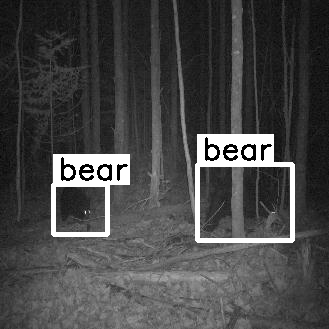

/Users/alex/Google Drive/pylabel/datasets/wildlife/yolo_splits/val/labels/../voc_annotations/../images/2020781_2.jpeg


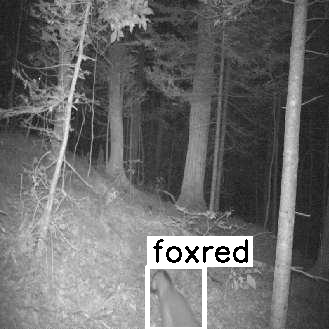

In [13]:
from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(dataset, 0))
display(dataset.visualize.ShowBoundingBoxes(dataset, "2020781_2.jpeg"))

# Export to VOC XML
The PyLabel exporter will export all of the annotations in the dataframe to the desired target format.
VOC creates one XML for each Jpeg in the dataset. 

In [9]:
dataset.export.ExportToVoc(dataset.df, write_to_file_=True)

()

<?xml version="1.0" ?>
<annotation>
	<filename>000000000139.jpg</filename>
	<size>
		<width>640</width>
		<height>426</height>
		<depth/>
	</size>
	<object>
		<name>potted plant</name>
		<pose/>
		<truncated/>
		<difficult/>
		<bndbox>
			<xmin>236.98</xmin>
			<xmax>261.68</xmax>
			<ymin>73.00999999999999</ymin>
			<ymax>142.51</ymax>
		</bndbox>
	</object>
	<object>
		<name>tv</name>
		<pose/>
		<truncated/>
		<difficult/>
		<bndbox>
			<xmin>7.03</xmin>
			<xmax>156.35</xmax>
			<ymin>72.88999999999999</ymin>
			<ymax>167.76</ymax>
		</bndbox>
	</object>
	<object>
		<name>tv</name>
		<pose/>
		<truncated/>
		<difficult/>
		<bndbox>
			<xmin>557.21</xmin>
			<xmax>638.5600000000001</xmax>
			<ymin>130.45999999999998</ymin>
			<ymax>209.19</ymax>
		</bndbox>
	</object>
	<object>
		<name>chair</name>
		<pose/>
		<truncated/>
		<difficult/>
		<bndbox>
			<xmin>358.98</xmin>
			<xmax>414.98</xmax>
			<ymin>115.22000000000001</ymin>
			<ymax>218.05</ymax>
		</bndbox>
	</object>
	<object>